# ART Boundary Attack

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import sys
!{sys.executable} -m pip install git+https://github.com/nottombrown/imagenet_stubs
sys.path.append("..")

%matplotlib inline

import imagenet_stubs
import numpy as np
import keras
from keras.preprocessing import image
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.layers import Dense, Flatten
from keras.models import Model
import keras.backend as k
from matplotlib import pyplot as plt
from IPython.display import clear_output

from art.classifiers import KerasClassifier
from art.attacks import BoundaryAttack
from art.utils import to_categorical

# Model Definition

In [ ]:
mean_imagenet = np.zeros([224, 224, 3])
mean_imagenet[...,0].fill(103.939)
mean_imagenet[...,1].fill(116.779)
mean_imagenet[...,2].fill(123.68)
model = ResNet50(weights='imagenet')
classifier = KerasClassifier(clip_values=(0, 255), model=model, preprocessing=(mean_imagenet, 1))

# Get Target and Init Images

Target image is:  105


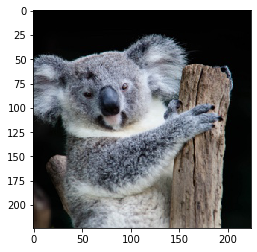

Init image is:  866


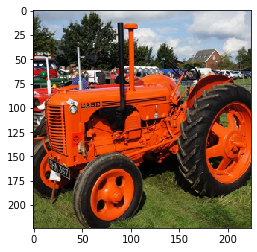

In [7]:
target_image_name = 'koala.jpg'
init_image_name = 'tractor.jpg'
for image_path in imagenet_stubs.get_image_paths():
    if image_path.endswith(target_image_name):
        target_image = image.load_img(image_path, target_size=(224, 224))
        target_image = image.img_to_array(target_image)
    if image_path.endswith(init_image_name):
        init_image = image.load_img(image_path, target_size=(224, 224))
        init_image = image.img_to_array(init_image)

print("Target image is: ", np.argmax(classifier.predict(np.array([target_image[..., ::-1]]))[0]))
plt.imshow(target_image.astype(np.uint))
plt.show()
print("Init image is: ", np.argmax(classifier.predict(np.array([init_image[..., ::-1]]))[0]))
plt.imshow(init_image.astype(np.uint))
plt.show()

# Boundary Untargeted Attack

Adversarial image at step 0. L2 error 42922.89 and class label 852.


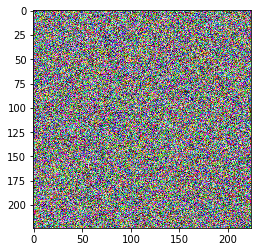

Adversarial image at step 200. L2 error 22358.719 and class label 852.


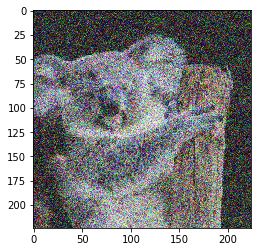

Adversarial image at step 400. L2 error 18218.713 and class label 852.


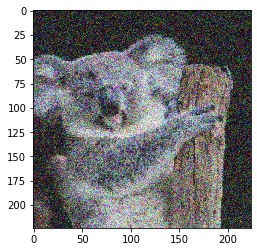

Adversarial image at step 600. L2 error 16308.051 and class label 852.


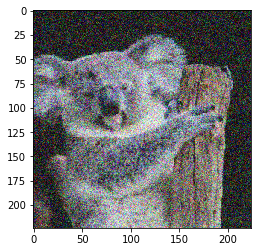

Adversarial image at step 800. L2 error 14653.266 and class label 852.


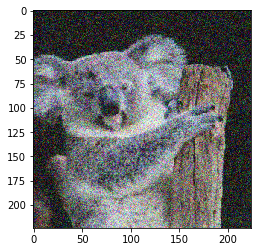

Adversarial image at step 1000. L2 error 12278.65 and class label 852.


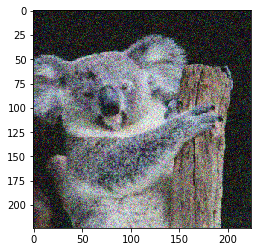

Adversarial image at step 1200. L2 error 10254.164 and class label 852.


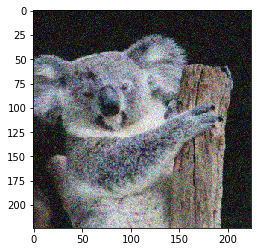

Adversarial image at step 1400. L2 error 8721.567 and class label 852.


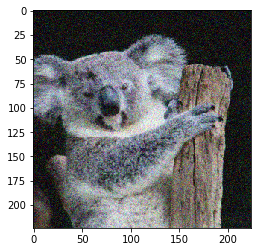

Adversarial image at step 1600. L2 error 7620.5938 and class label 852.


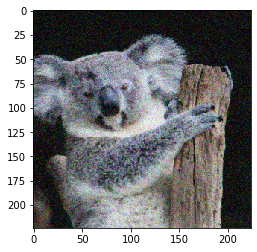

Adversarial image at step 1800. L2 error 6323.719 and class label 852.


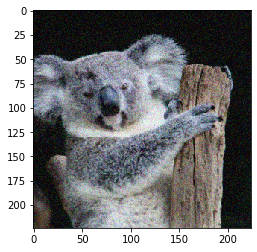

Adversarial image at step 2000. L2 error 5457.779 and class label 852.


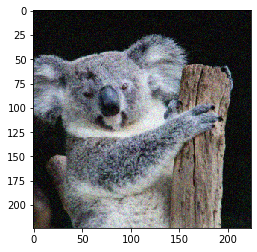

Adversarial image at step 2200. L2 error 4771.6084 and class label 852.


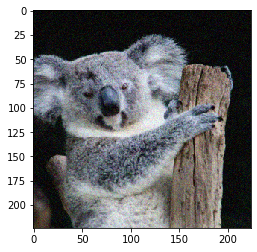

Adversarial image at step 2400. L2 error 4228.516 and class label 852.


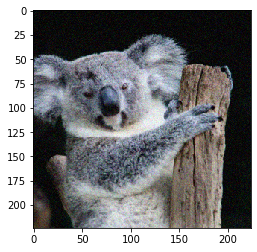

Adversarial image at step 2600. L2 error 3865.4277 and class label 852.


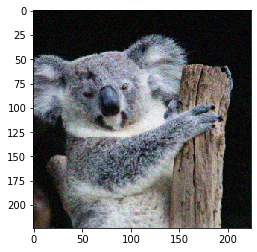

Adversarial image at step 2800. L2 error 3703.4622 and class label 852.


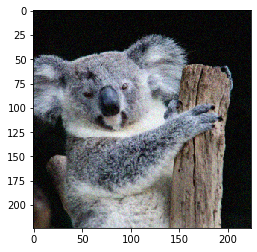

Adversarial image at step 3000. L2 error 3428.8474 and class label 852.


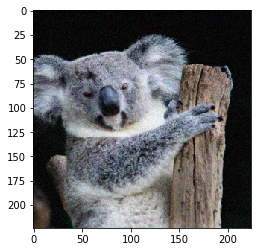

Adversarial image at step 3200. L2 error 3276.229 and class label 852.


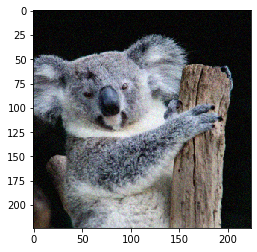

Adversarial image at step 3400. L2 error 3143.524 and class label 852.


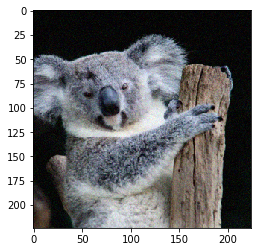

Adversarial image at step 3600. L2 error 2963.6 and class label 852.


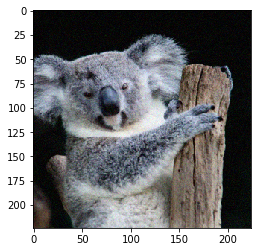

Adversarial image at step 3800. L2 error 2892.3547 and class label 852.


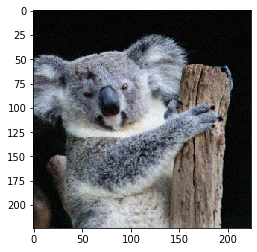

In [8]:
attack = BoundaryAttack(classifier=classifier, targeted=False, max_iter=0, delta=0.001, epsilon=0.001)
iter_step = 200
x_adv = None
for i in range(20):
    x_adv = attack.generate(x=np.array([target_image[..., ::-1]]), x_adv_init=x_adv)

    #clear_output()
    print("Adversarial image at step %d." % (i * iter_step), "L2 error", 
          np.linalg.norm(np.reshape(x_adv[0] - target_image[..., ::-1], [-1])),
          "and class label %d." % np.argmax(classifier.predict(x_adv)[0]))
    plt.imshow(x_adv[0][..., ::-1].astype(np.uint))
    plt.show(block=False)
    
    if hasattr(attack, 'curr_delta') and hasattr(attack, 'curr_epsilon'):
        attack.max_iter = iter_step 
        attack.delta = attack.curr_delta
        attack.epsilon = attack.curr_epsilon
    else:
        break

# Boundary Targeted Attack

Adversarial image at step 0. L2 error 44399.297 and class label 866.


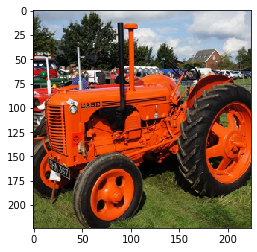

Adversarial image at step 200. L2 error 12083.705 and class label 866.


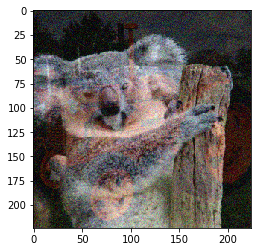

Adversarial image at step 400. L2 error 10029.933 and class label 866.


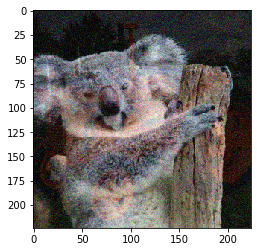

Adversarial image at step 600. L2 error 8110.303 and class label 866.


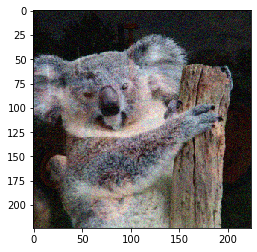

Adversarial image at step 800. L2 error 7054.2686 and class label 866.


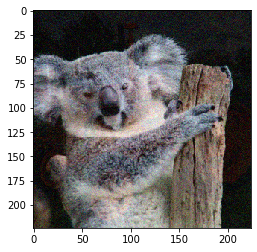

Adversarial image at step 1000. L2 error 6186.3833 and class label 866.


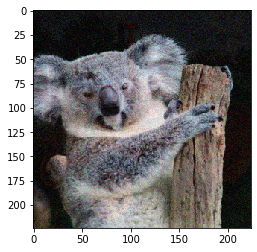

Adversarial image at step 1200. L2 error 5426.9478 and class label 866.


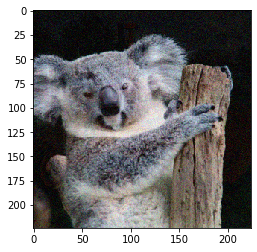

Adversarial image at step 1400. L2 error 4796.9717 and class label 866.


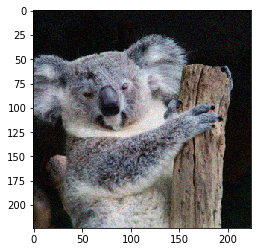

Adversarial image at step 1600. L2 error 4464.611 and class label 866.


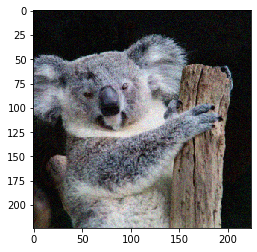

Adversarial image at step 1800. L2 error 3944.5132 and class label 866.


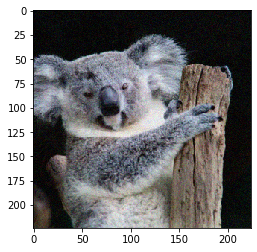

Adversarial image at step 2000. L2 error 3666.442 and class label 866.


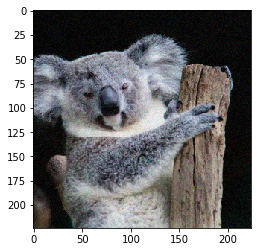

Adversarial image at step 2200. L2 error 3337.7947 and class label 866.


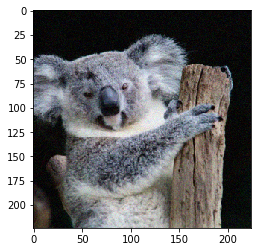

Adversarial image at step 2400. L2 error 3063.129 and class label 866.


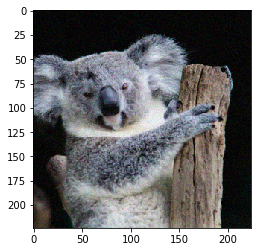

Adversarial image at step 2600. L2 error 2921.1145 and class label 866.


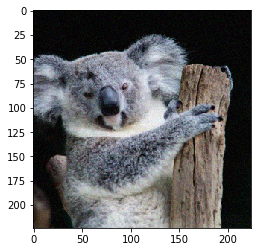

Adversarial image at step 2800. L2 error 2758.0269 and class label 866.


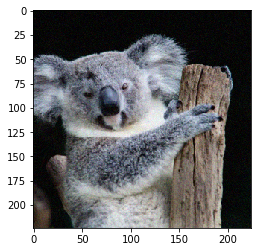

Adversarial image at step 3000. L2 error 2717.5083 and class label 866.


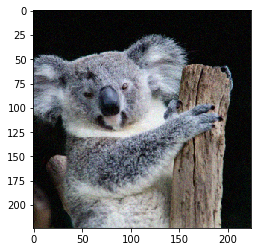

Adversarial image at step 3200. L2 error 2576.5305 and class label 866.


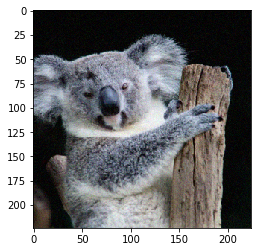

Adversarial image at step 3400. L2 error 2512.2668 and class label 866.


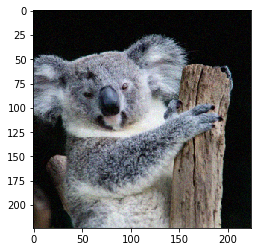

Adversarial image at step 3600. L2 error 2442.1577 and class label 866.


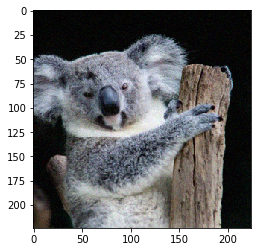

Adversarial image at step 3800. L2 error 2482.2053 and class label 866.


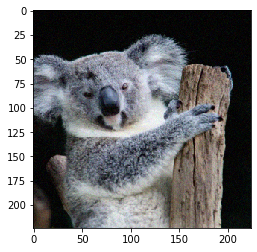

In [10]:
attack = BoundaryAttack(classifier=classifier, targeted=True, max_iter=0, delta=0.001, epsilon=0.001)
iter_step = 200
x_adv = np.array([init_image[..., ::-1]])

for i in range(20):
    x_adv = attack.generate(x=np.array([target_image[..., ::-1]]), y=to_categorical([866], 1000), x_adv_init=x_adv)

    #clear_output()    
    print("Adversarial image at step %d." % (i * iter_step), "L2 error", 
          np.linalg.norm(np.reshape(x_adv[0] - target_image[..., ::-1], [-1])),
          "and class label %d." % np.argmax(classifier.predict(x_adv)[0]))
    plt.imshow(x_adv[0][..., ::-1].astype(np.uint))
    plt.show(block=False)
    
    if hasattr(attack, 'curr_delta') and hasattr(attack, 'curr_epsilon'):
        attack.max_iter = iter_step 
        attack.delta = attack.curr_delta
        attack.epsilon = attack.curr_epsilon
    else:
        break

# Unsquared Images

Boundary attack supports inputs of unsquared images. The code in the following cell describes an example of creating a Resnet50-based classifier to attack unsquared images.

In [6]:
# Adjust image shape here
image_shape = (224, 150)

mean_imagenet = np.zeros(tuple(list(image_shape) + [3]))
mean_imagenet[...,0].fill(103.939)
mean_imagenet[...,1].fill(116.779)
mean_imagenet[...,2].fill(123.68)

model = ResNet50(weights='imagenet', input_shape=tuple(list(image_shape) + [3]), include_top=False)

def _kr_initialize(_, dtype=None):
    return k.variable(value=np.random.randn(np.prod(list(model.output.shape)[1:]).value, 1000))

head = model.output
head = Flatten()(head)
head = Dense(1000, kernel_initializer=_kr_initialize, bias_initializer=keras.initializers.Zeros())(head)
new_model = Model(inputs=model.input, outputs=head)

classifier = KerasClassifier(clip_values=(0, 255), model=new_model, preprocessing=(mean_imagenet, 1))
# Then call classifier.fit() to train the new weights

/Users/minhtn/ibm/installation/miniconda3/lib/python3.6/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
